### Import Requiered Libraties

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [144]:
ASD_df = pd.read_csv('ASD_Data_Combined.csv')
ASD_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,1,1,1,0,1,1,0,1,0,...,f,Middle Eastern,no,no,Anguilla,yes,6,12-15 years,Parent,NO
392,1,0,1,0,0,0,0,1,0,1,...,m,Asian,no,no,India,no,4,12-15 years,Parent,NO
393,1,0,0,1,1,1,1,1,1,1,...,f,White-European,no,no,United Kingdom,no,8,12-16 years,Self,YES
394,1,1,0,1,1,0,0,0,1,1,...,f,White-European,no,no,United Kingdom,no,6,12-16 years,Self,NO


### Change Columns Names

In [124]:
ASD_df.rename(columns={f'A{i}_Score': f'question_{i}' for i in range(1, 11)}, inplace=True)
new_names = {'age_desc': 'age_ranges', 'result': 'total_score', 'jundice': 'jundice_history', 'austim': 'austim_history', 'contry_of_res': 'country_of_residence', 'used_app_before': 'prior_app_use', 'Class/ASD': 'asd_diagnosis'}
ASD_df.rename(columns=new_names, inplace=True)
n_columns = len(ASD_df.columns)
n_columns

21

### Drop unnecessary columns


In [125]:
columns_to_drop = ['total_score','ethnicity', 'relation', 'age', 'prior_app_use']
ASD_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

### Target unique_values

Unique values in the 'asd_diagnosis' column: ['NO' 'YES']
Count of unique values in the 'asd_diagnosis' column:
YES    204
NO     192
Name: asd_diagnosis, dtype: int64


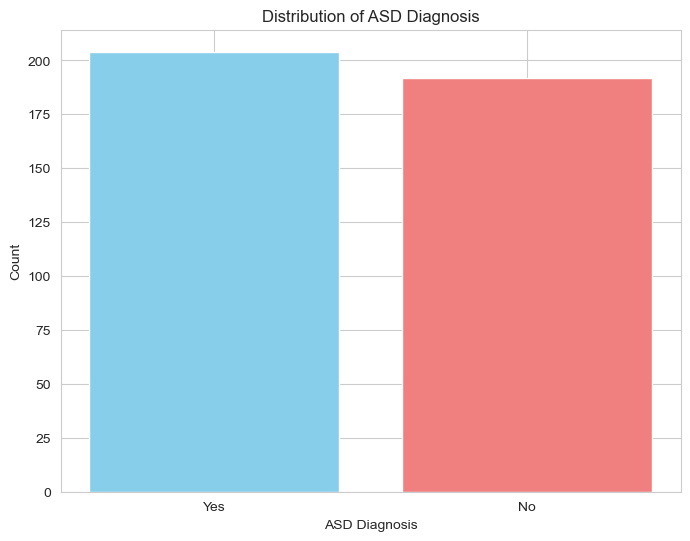

In [126]:
unique_values = ASD_df['asd_diagnosis'].unique()
print("Unique values in the 'asd_diagnosis' column:", unique_values)

value_counts = ASD_df['asd_diagnosis'].value_counts()
print("Count of unique values in the 'asd_diagnosis' column:")
print(value_counts)
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(value_counts.index, value_counts.values, color=['skyblue', 'lightcoral'])

plt.xlabel('ASD Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of ASD Diagnosis')
plt.xticks(unique_values, ['No', 'Yes'])  # Set x-tick labels
plt.show()


### Percentage of 'Yes' Responses for Each Question in ASD-Positive Cases

In [127]:
df_positive_asd = ASD_df[ASD_df['asd_diagnosis'] == 'YES']

# Calculate mean of each question column for positive ASD cases and multiply by 100 
mean_scores = df_positive_asd.filter(regex='^question_\d+$').mean() * 100
percentages = mean_scores.round(2)

df_plot = pd.DataFrame({'Question': mean_scores.index, 'Percentage': percentages})

print("Percentage of 'Yes' Responses for Each Question in ASD-Positive Cases:")
print(df_plot.to_markdown(index=False, numalign="left", stralign="left"))

chart = alt.Chart(df_plot, title='Percentage of "Yes" Responses for Each Question in ASD-Positive Cases').mark_bar().encode(
    x=alt.X('Question:N', sort=None, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Percentage:Q'),
    tooltip=['Question', 'Percentage']
).interactive()

chart.show()

Percentage of 'Yes' Responses for Each Question in ASD-Positive Cases:
| Question    | Percentage   |
|:------------|:-------------|
| question_1  | 81.86        |
| question_2  | 64.22        |
| question_3  | 89.71        |
| question_4  | 85.78        |
| question_5  | 92.16        |
| question_6  | 91.18        |
| question_7  | 71.57        |
| question_8  | 74.02        |
| question_9  | 79.9         |
| question_10 | 90.2         |


alt.Chart(...)

In [128]:
unique_values = ASD_df['country_of_residence'].unique()
print("Unique values in the 'country_of_residence' column:", unique_values)

value_counts = ASD_df['country_of_residence'].value_counts()
print("Count of unique values in the 'country_of_residence' column:")
print(value_counts)

Unique values in the 'country_of_residence' column: ['Jordan' 'United States' 'Egypt' 'United Kingdom' 'Bahrain' 'Austria'
 'Kuwait' 'United Arab Emirates' 'Europe' 'Malta' 'Bulgaria'
 'South Africa' 'India' 'Afghanistan' 'Georgia' 'New Zealand' 'Syria'
 'Iraq' 'Australia' 'Saudi Arabia' 'Armenia' 'Turkey' 'Pakistan' 'Canada'
 'Oman' 'Brazil' 'South Korea' 'Costa Rica' 'Sweden' 'Philippines'
 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar' 'Ireland' 'Romania'
 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Russia' 'Italy' 'China'
 'Nigeria' 'U.S. Outlying Islands' 'Nepal' 'Mexico' 'Isle of Man' 'Libya'
 'Ghana' 'Bhutan' 'AmericanSamoa' 'Albania' 'Belgium' 'Azerbaijan'
 'Croatia' 'France' 'Indonesia' 'Greenland' 'Bahamas' 'Viet Nam' 'Comoros'
 'Portugal' 'Finland' 'Norway' 'Anguilla']
Count of unique values in the 'country_of_residence' column:
United Kingdom           78
United States            54
India                    49
Australia                25
Jordan                   21
   

In [129]:
# Rename the column 'country_of_residence' to 'continent'
ASD_df.rename(columns={'country_of_residence': 'continent'}, inplace=True)

In [130]:
ASD_df.continent=ASD_df.continent.replace({
    'Jordan': 'Asia', 'United States': 'North America', 'Egypt': 'Africa', 'United Kingdom': 'Europe',
    'Bahrain': 'Asia', 'Austria': 'Europe', 'Kuwait': 'Asia', 'United Arab Emirates': 'Asia',
    'Europe': 'Europe', 'Malta': 'Europe', 'Bulgaria': 'Europe', 'South Africa': 'Africa', 'India': 'Asia',
    'Afghanistan': 'Asia', 'Georgia': 'Asia', 'New Zealand': 'Oceania', 'Syria': 'Asia', 'Iraq': 'Asia',
    'Australia': 'Oceania', 'Saudi Arabia': 'Asia', 'Armenia': 'Asia', 'Turkey': 'Asia', 'Pakistan': 'Asia',
    'Canada': 'North America', 'Oman': 'Asia', 'Brazil': 'South America', 'South Korea': 'Asia',
    'Costa Rica': 'North America', 'Sweden': 'Europe', 'Philippines': 'Asia', 'Malaysia': 'Asia',
    'Argentina': 'South America', 'Japan': 'Asia', 'Bangladesh': 'Asia', 'Qatar': 'Asia', 'Ireland': 'Europe',
    'Romania': 'Europe', 'Netherlands': 'Europe', 'Lebanon': 'Asia', 'Germany': 'Europe', 'Latvia': 'Europe',
    'Russia': 'Europe', 'Italy': 'Europe', 'China': 'Asia', 'Nigeria': 'Africa', 'U.S. Outlying Islands': 'Oceania',
    'Nepal': 'Asia', 'Mexico': 'North America', 'Isle of Man': 'Europe', 'Libya': 'Africa', 'Ghana': 'Africa',
    'Bhutan': 'Asia', 'AmericanSamoa': 'Oceania', 'Albania': 'Europe', 'Belgium': 'Europe', 'Azerbaijan': 'Asia',
    'Croatia': 'Europe', 'France': 'Europe', 'Indonesia': 'Asia', 'Greenland': 'North America', 'Bahamas': 'North America',
    'Viet Nam': 'Asia', 'Comoros': 'Africa', 'Portugal': 'Europe', 'Finland': 'Europe', 'Norway': 'Europe', 'Anguilla': 'North America'
})
print(ASD_df.continent.value_counts())
print(ASD_df.continent.nunique())

Asia             136
Europe           113
North America     70
Oceania           42
Africa            20
South America     15
Name: continent, dtype: int64
6


### map catagorical columns

In [131]:
gender_map = {"m": 1, "f": 0}
austim_history_map = {"no": 0, "yes": 1}
age_ranges_map = {"4-11 years": 1, "12-16 years": 0, "12-15 years": 0}
asd_diagnosis_map = {"NO": 0, "YES": 1}
jundice_history_map = {"no": 0, "yes": 1} 
continent_map = {
    "Asia": 0,
    "North America": 1,
    "Africa": 2,
    "Europe": 3,
    "Oceania": 4,
    "South America": 5,
}
ASD_df["gender"] = ASD_df["gender"].map(gender_map)
ASD_df["austim_history"] = ASD_df["austim_history"].map(austim_history_map)
ASD_df["age_ranges"] = ASD_df["age_ranges"].map(age_ranges_map)
ASD_df["asd_diagnosis"] = ASD_df["asd_diagnosis"].map(asd_diagnosis_map)
ASD_df["jundice_history"] = ASD_df["jundice_history"].map(jundice_history_map)
ASD_df["continent"] = ASD_df["continent"].map(continent_map) 

### correlation_matrix

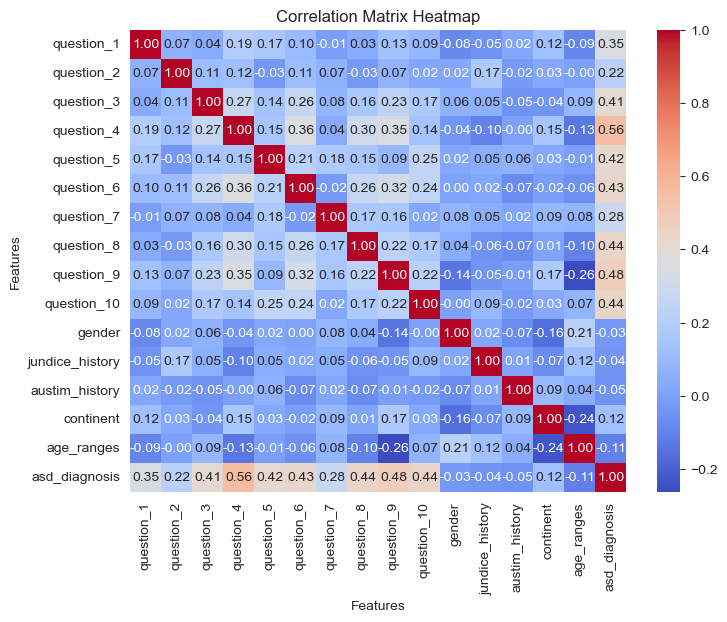

In [132]:
correlation_matrix = ASD_df.corr()

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

correlation_df = correlation_matrix.reset_index().melt(id_vars='index')
correlation_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

chart = alt.Chart(correlation_df, title='Correlation Matrix Heatmap').mark_rect().encode(
    x=alt.X('Feature 1:N', sort=None),
    y=alt.Y('Feature 2:N', sort=None),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='blueorange')),
    tooltip=['Feature 1', 'Feature 2', 'Correlation']
).properties(
    width=600,
    height=500
).interactive()
chart.save('correlation_heatmap_altair.json')

### PCA

In [133]:
X = ASD_df.drop('asd_diagnosis', axis=1)
y = ASD_df['asd_diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Create a new DataFrame with PCA components and target variable
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['asd_diagnosis'] = y
print(pca_df.head().to_markdown(index=False, numalign="left", stralign="left"))

| PC1      | PC2       | PC3       | PC4       | PC5       | PC6      | PC7       | PC8      | PC9        | PC10       | PC11      | PC12      | PC13      | PC14     | PC15      | asd_diagnosis   |
|:---------|:----------|:----------|:----------|:----------|:---------|:----------|:---------|:-----------|:-----------|:----------|:----------|:----------|:---------|:----------|:----------------|
| 1.3823   | -0.524897 | -0.915928 | 0.0844872 | -0.597257 | -1.25709 | -1.23801  | 2.10702  | 0.128057   | -0.505221  | -0.508461 | -0.667421 | -0.322052 | -1.16854 | -1.17044  | 0               |
| 1.3823   | -0.524897 | -0.915928 | 0.0844872 | -0.597257 | -1.25709 | -1.23801  | 2.10702  | 0.128057   | -0.505221  | -0.508461 | -0.667421 | -0.322052 | -1.16854 | -1.17044  | 0               |
| 1.7248   | -0.454285 | -0.949088 | 0.263345  | 1.27139   | -1.22158 | -0.9239   | 1.33715  | 0.326911   | -1.82595   | -0.430677 | 0.0654078 | -0.819496 | -1.52195 | 0.35872   | 0               |
| 1.78642 

### variance ratio

In [134]:
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})
print("Explained Variance Ratios:")
print(explained_variance_df.to_markdown(index=False, numalign="left", stralign="left"))

# Calculate cumulative explained variance for the first 5 components
cumulative_variance = explained_variance_ratio[:5].sum()
print(f"\nCumulative Explained Variance for the first 5 PCs: {cumulative_variance:.2%}")

Explained Variance Ratios:
| Principal Component   | Explained Variance Ratio   |
|:----------------------|:---------------------------|
| PC1                   | 0.16849                    |
| PC2                   | 0.108847                   |
| PC3                   | 0.0813181                  |
| PC4                   | 0.0783397                  |
| PC5                   | 0.0731491                  |
| PC6                   | 0.0656482                  |
| PC7                   | 0.0628789                  |
| PC8                   | 0.0546433                  |
| PC9                   | 0.0531858                  |
| PC10                  | 0.0490617                  |
| PC11                  | 0.0477923                  |
| PC12                  | 0.0464302                  |
| PC13                  | 0.0427144                  |
| PC14                  | 0.0370052                  |
| PC15                  | 0.0304954                  |

Cumulative Explained Variance for the

### Scree Plot

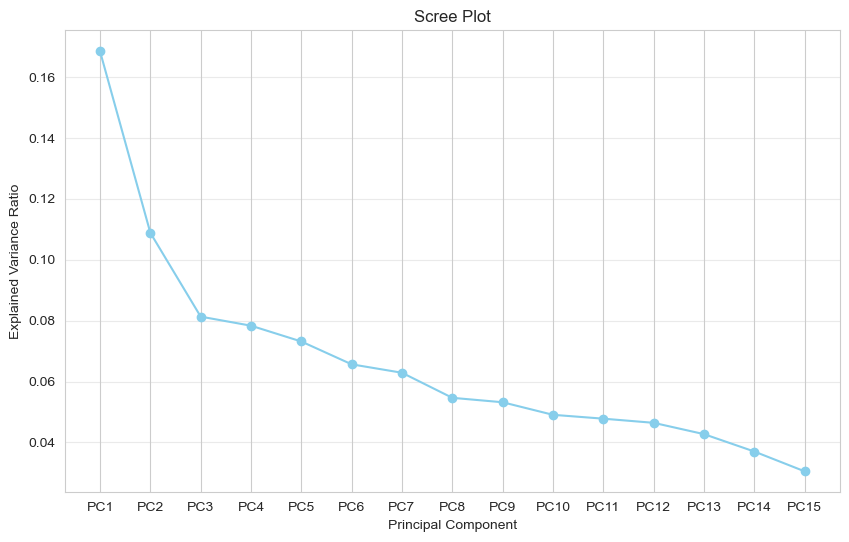

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance Ratio'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(explained_variance_df['Principal Component'])
plt.grid(axis='y', alpha=0.4)
plt.show()

### scatter plot

In [136]:
chart = alt.Chart(pca_df, title='Projection of Data onto First Two Principal Components').mark_circle().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('asd_diagnosis:N', scale=alt.Scale(domain=[0, 1], range=['skyblue', 'lightcoral'])),
    tooltip=['PC1', 'PC2', 'asd_diagnosis']
).interactive()

chart.save('pca_scatter_plot.json')
chart.show()

alt.Chart(...)

### Biplot_pc1_pc2_with_loadings

In [137]:
chart_width = 800
chart_height = 600
# Create the base chart for the biplot points
base = alt.Chart(biplot_df, title='Biplot of PC1 vs. PC2 with Loadings').mark_circle(size=100).encode(
    x=alt.X('PC1', axis=alt.Axis(title='PC1')),
    y=alt.Y('PC2', axis=alt.Axis(title='PC2')),
    color='Label:N',
    tooltip=['PC1', 'PC2', 'Label']
).properties(width=chart_width, height=chart_height)

# Create the chart for the loadings (arrows)
arrows = alt.Chart(loadings_df.reset_index()).mark_point(size=100).encode(
    x=alt.X('PC1_loading:Q', axis=alt.Axis(title='PC1')),
    y=alt.Y('PC2_loading:Q', axis=alt.Axis(title='PC2')),
    detail='index:N',  # Use feature names as detail for tooltips
    tooltip=['index:N', 'PC1_loading', 'PC2_loading']
).properties(width=chart_width, height=chart_height)

text = arrows.mark_text(align='left', baseline='middle', dx=5).encode(
    text='index:N'
)
# Combine points and arrows into a single chart
chart = base + arrows + text
chart.save('biplot_pc1_pc2_with_loadings.html')
from IPython.display import IFrame
IFrame('biplot_pc1_pc2_with_loadings.html', width=chart_width, height=chart_height)

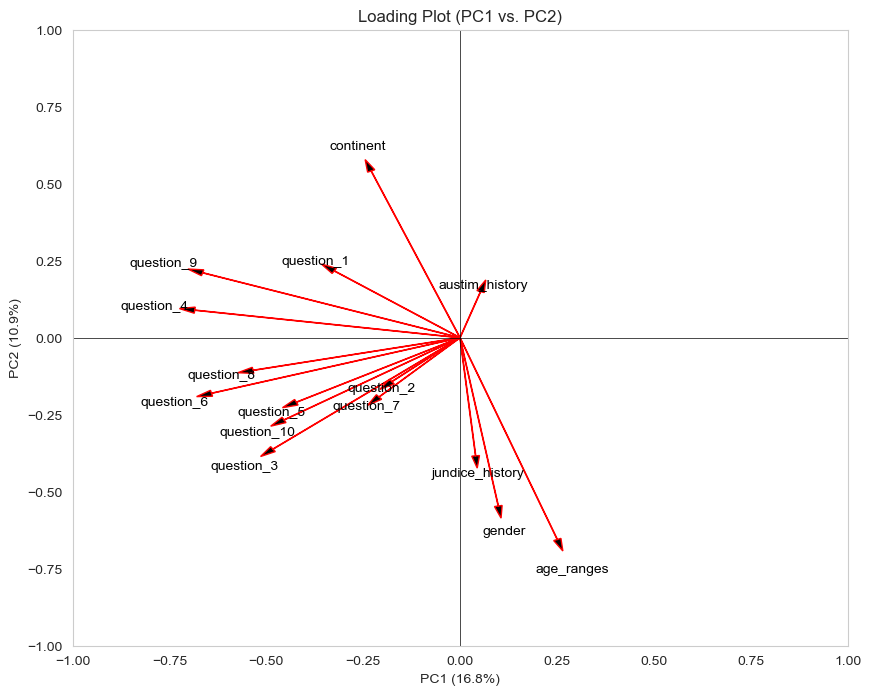

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Loading Plot 
plt.figure(figsize=(10, 8))  
sns.set_style("whitegrid") 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_labels = X.columns

for i, feature in enumerate(loading_labels):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.02, head_length=0.04, fc='k', ec='r')
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='k', ha='center', va='center', fontsize=10)  

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Loading Plot (PC1 vs. PC2)')
plt.grid()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(0, color='k', linestyle='-', linewidth=0.5)
plt.show()

# Biplot (Combining scatter plot with loadings using Altair)
biplot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
biplot_df['Label'] = y
loadings_df = pd.DataFrame(loadings, columns=['PC1_loading', 'PC2_loading'], index=loading_labels)

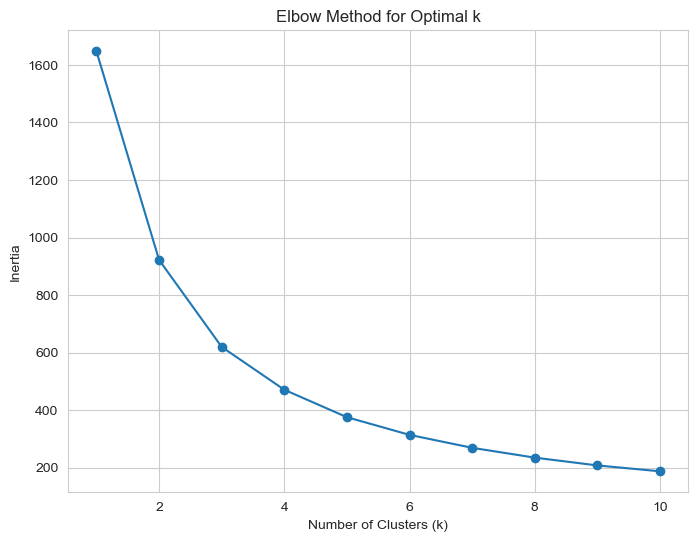

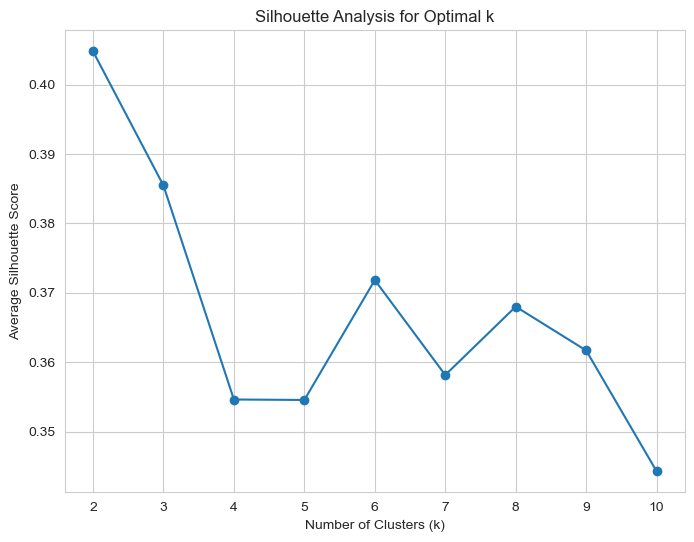

In [139]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Analysis
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Choose optimal k (based on your analysis of the plots)
optimal_k = 3  # Example: You might choose 3 based on the plots

# Fit K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Create scatter plot with cluster assignments
chart = alt.Chart(pca_df, title=f'K-means Clustering (k={optimal_k})').mark_circle().encode(
    x='PC1',
    y='PC2',
    color='Cluster:N',
    tooltip=['PC1', 'PC2', 'Cluster']
).interactive()

# Add labels to the clusters
cluster_centers = kmeans.cluster_centers_
text = alt.Chart({'values': [{'x': c[0], 'y': c[1], 'label': i} for i, c in enumerate(cluster_centers)]}).mark_text(
    align='center',
    baseline='middle',
    dx=5,  
    dy=-5,  
).encode(
    x='x:Q',
    y='y:Q',
    text='label:N'
)

# Combine the scatter plot and text labels
final_chart = chart + text

# Save the chart
final_chart.save('kmeans_scatter_plot_with_labels.json')


In [140]:
chart = alt.Chart(pca_df, title=f'K-means Clustering (k={optimal_k})').mark_circle().encode(
    x='PC1',
    y='PC2',
    color='Cluster:N', 
    tooltip=['PC1', 'PC2', 'Cluster']
).interactive()

# Add labels to the clusters
cluster_centers = kmeans.cluster_centers_
text = alt.Chart({'values': [{'x': c[0], 'y': c[1], 'label': i} for i, c in enumerate(cluster_centers)]}).mark_text(
    align='center',
    baseline='middle',
    dx=5,
    dy=-5,
).encode(
    x='x:Q',
    y='y:Q',
    text='label:N'
)

# Combine the scatter plot and text labels
final_chart = chart + text
# Display the chart
final_chart.show()

alt.LayerChart(...)

Cluster Profiles:
| question_1   | question_2   | question_3   | question_4   | question_5   | question_6   | question_7   | question_8   | question_9   | question_10   | continent   | Cluster Size   |
|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:--------------|:------------|:---------------|
| 0.701        | 0.623        | 0.94         | 0.749        | 0.886        | 0.922        | 0.677        | 0.707        | 0.659        | 0.904         | 1.371       | 167            |
| 0.48         | 0.415        | 0.431        | 0.187        | 0.52         | 0.358        | 0.455        | 0.203        | 0.163        | 0.439         | 1.382       | 123            |
| 0.802        | 0.538        | 0.708        | 0.811        | 0.783        | 0.849        | 0.585        | 0.623        | 0.906        | 0.708         | 2.764       | 106            |


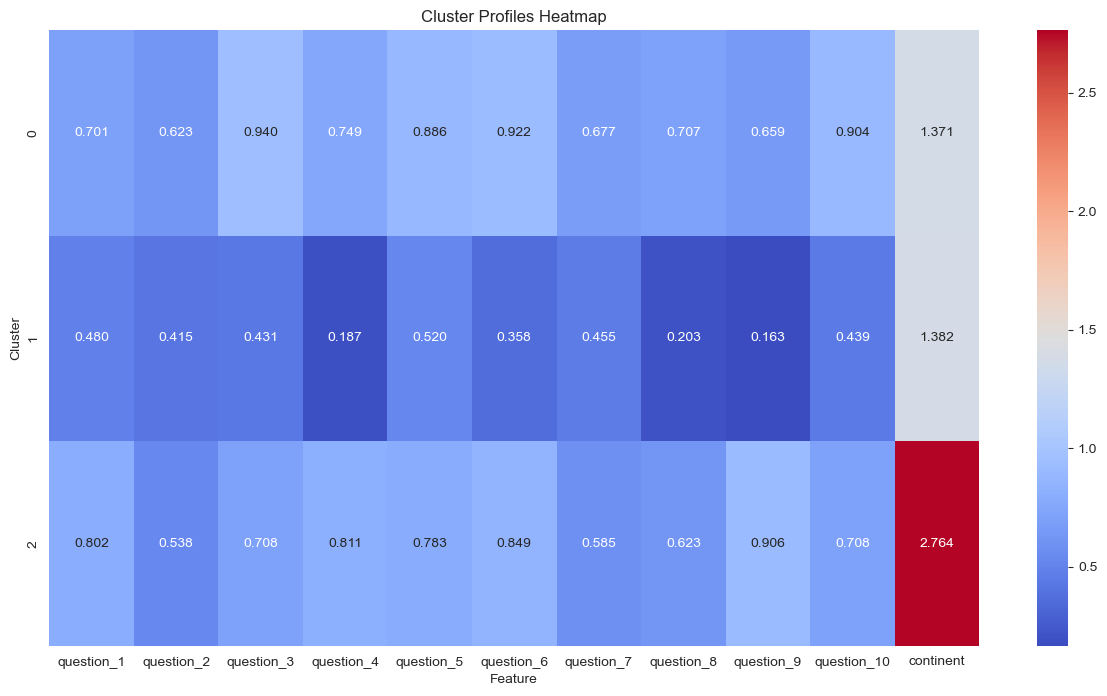

In [141]:
#Combine PCA data with original columns
columns_to_analyze = ['question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'question_6', 'question_7', 'question_8', 'question_9', 'question_10', 'continent']
combined_df = pd.concat([pca_df, ASD_df[columns_to_analyze]], axis=1)
#Calculate mean values for each cluster
cluster_means = combined_df.groupby('Cluster')[columns_to_analyze].mean()

#Calculate cluster sizes
cluster_sizes = pca_df['Cluster'].value_counts().reset_index(name='Cluster Size')
cluster_sizes = cluster_sizes.rename(columns={'index': 'Cluster'})
#Create cluster profiles DataFrame
cluster_profiles = cluster_means.join(cluster_sizes.set_index('Cluster'))

#Round mean values
cluster_profiles.iloc[:, :-1] = cluster_profiles.iloc[:, :-1].round(3)
#Print cluster profiles
print("Cluster Profiles:")
print(cluster_profiles.to_markdown(index=False, numalign="left", stralign="left"))

plt.figure(figsize=(15, 8)) 
sns.heatmap(cluster_profiles.drop(columns=['Cluster Size']), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Cluster Profiles Heatmap')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

heatmap_data = cluster_profiles.drop(columns=['Cluster Size']).reset_index().melt('Cluster')
heatmap_data.columns = ['Cluster', 'Feature', 'Mean Value']

chart = alt.Chart(heatmap_data, title='Cluster Profiles Heatmap').mark_rect().encode(
    x=alt.X('Feature:N', sort=None, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Cluster:N', sort=None),
    color=alt.Color('Mean Value:Q', scale=alt.Scale(scheme='redblue')),
    tooltip=['Cluster', 'Feature', 'Mean Value']
).interactive()
chart.save('cluster_profiles_heatmap_altair.json')

### Feature Selection

In [142]:
X_combined = pd.concat([X], axis=1)

scaler = MinMaxScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Feature Selection using SelectKBest with ANOVA F-test
selector = SelectKBest(f_classif, k=7) 
X_selected = selector.fit_transform(X_combined_scaled, y)

selected_features = X_combined.columns[selector.get_support()]
print("Selected features:", selected_features)

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Calculate mutual information scores 
mi_scores = mutual_info_classif(X_selected, y, discrete_features='auto', random_state=42)  # Use X_selected here

mutual_info_scores_df = pd.DataFrame({
    'Feature': selected_features,
    'Mutual Information Score': mi_scores  # Directly use mi_scores here
})
# Sort by mutual information scores in descending order
mutual_info_scores_df.sort_values(by='Mutual Information Score', ascending=False, inplace=True)
print("Mutual Information Test Results:")
print(mutual_info_scores_df.to_markdown(index=False, numalign="left", stralign="left"))

Selected features: Index(['question_3', 'question_4', 'question_5', 'question_6', 'question_8',
       'question_9', 'question_10'],
      dtype='object')
Mutual Information Test Results:
| Feature     | Mutual Information Score   |
|:------------|:---------------------------|
| question_4  | 0.199868                   |
| question_6  | 0.11556                    |
| question_10 | 0.111674                   |
| question_3  | 0.111416                   |
| question_9  | 0.106356                   |
| question_8  | 0.0894117                  |
| question_5  | 0.0877865                  |


### ML Algorithms

Evaluating: Random Forest
Cross-validation scores: [0.97828863 0.95530013 0.99007937 0.933687   0.9535809 ]
Mean ROC AUC: 0.9621872061527235


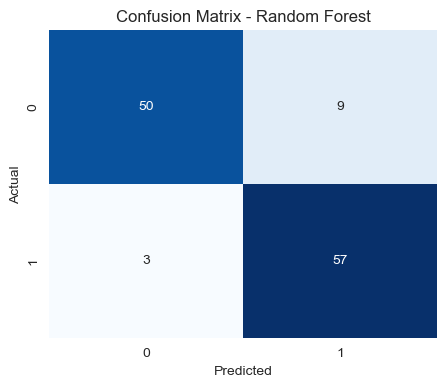

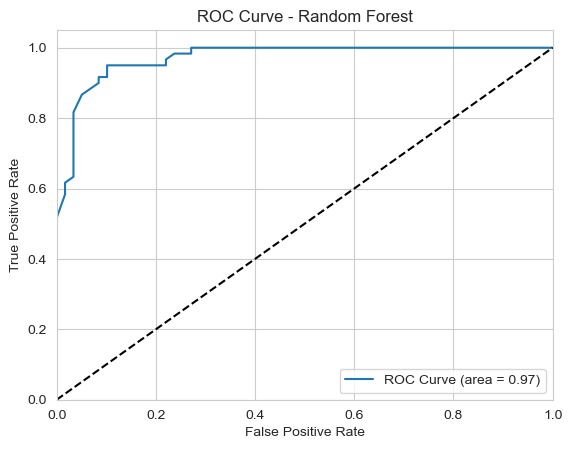

Evaluating: SVM
Cross-validation scores: [0.97956577 0.96679438 0.99537037 0.9602122  0.95888594]
Mean ROC AUC: 0.9721657333726299


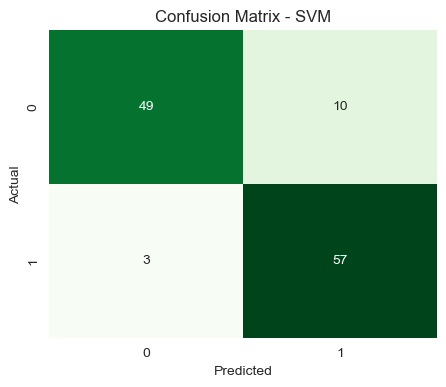

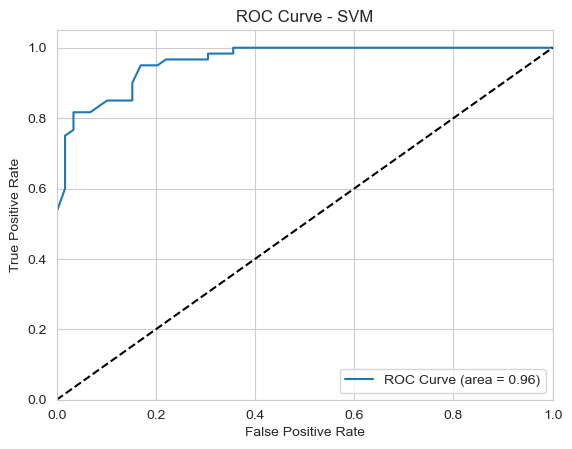

Evaluating: KNN
Cross-validation scores: [0.97254151 0.96871009 0.98280423 0.91843501 0.93633952]
Mean ROC AUC: 0.9557660730074524


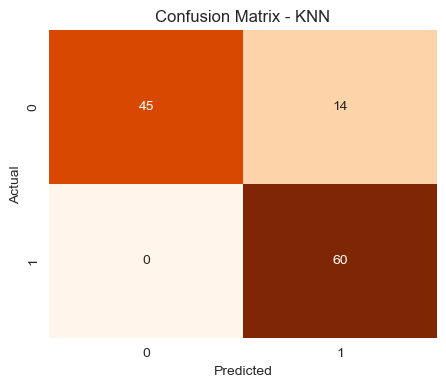

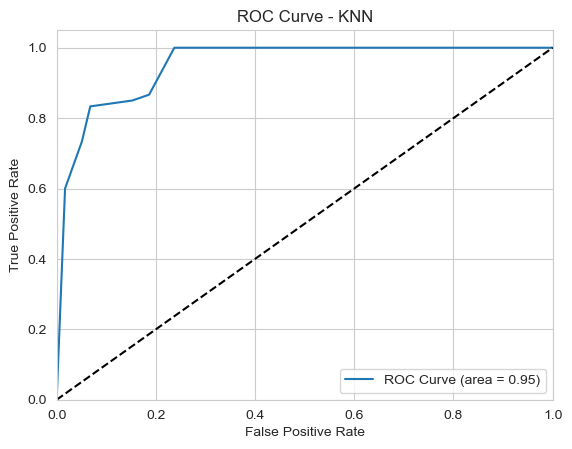

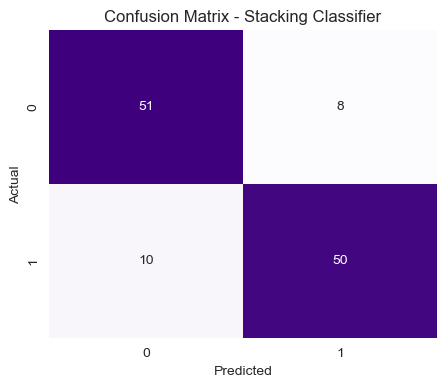

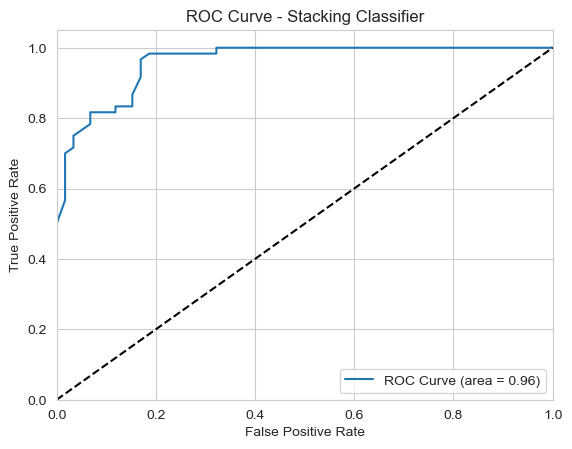

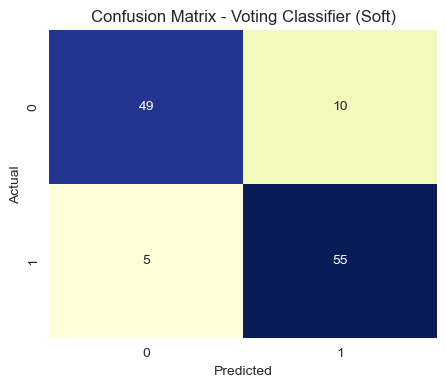

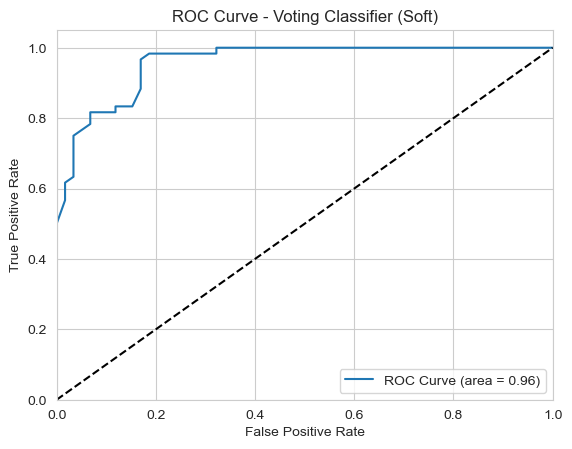

| Model                    | Best Score   | Best Params                           | Test ROC AUC   | Precision   | Recall   | F1 Score   | Classification Report                                 | Confusion Matrix   |
|:-------------------------|:-------------|:--------------------------------------|:---------------|:------------|:---------|:-----------|:------------------------------------------------------|:-------------------|
| Random Forest            | 0.962187     | {'max_depth': 5, 'n_estimators': 100} | 0.971045       | 0.863636    | 0.95     | 0.904762   | precision    recall  f1-score   support               | [[50  9]           |
|                          |              |                                       |                |             |          |            |                                                       |  [ 3 57]]          |
|                          |              |                                       |                |             |          |           

In [143]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

param_grids = {
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "KNN": {"n_neighbors": [3, 5, 7, 9, 11]}
}

results = []
cmap_list = ["Blues", "Greens", "Oranges", "Reds", "Purples"]  

# Iterate through models and evaluate
for i, (name, model) in enumerate(models.items()):
    print(f"Evaluating: {name}")

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="roc_auc")
    grid_search.fit(X_train, y_train)  # Only X_train and y_train are needed
    best_model = grid_search.best_estimator_

    # Cross-validation on the best model using selected features
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
    print("Cross-validation scores:", scores)
    print("Mean ROC AUC:", scores.mean())

    # Predictions and Metrics (use X_test_selected)
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

    results.append({
        "Model": name,
        "Best Score": grid_search.best_score_,
        "Best Params": grid_search.best_params_,
        "Test ROC AUC": test_roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    })

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap=cmap_list[i % len(cmap_list)], cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (area = {test_roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()

# Stacking model
estimators = [(name, model) for name, model in models.items() if name != "Stacking Classifier"]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train the stacking model using selected features
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

stacking_result = {
    "Model": "Stacking Classifier",
    "Test ROC AUC": test_roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Classification Report": classification_report(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
}
results.append(stacking_result)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="Purples", cbar=False)  # Using a different colormap
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {stacking_result['Model']}")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {test_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {stacking_result['Model']}")
plt.legend(loc="lower right")
plt.show()


# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(estimators=[
    ("Random Forest", models["Random Forest"]),
    ("SVM", models["SVM"]),
    ("KNN", models["KNN"]),
], voting='soft', weights=[2, 1, 1])  

# Train the Voting Classifier using selected features
voting_clf.fit(X_train, y_train)

# Evaluation and visualization for Voting Classifier
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

voting_result = {
    "Model": "Voting Classifier (Soft)",
    "Test ROC AUC": test_roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Classification Report": classification_report(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
}
results.append(voting_result)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="YlGnBu", cbar=False)  # Using a different colormap
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {voting_result['Model']}")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {test_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {voting_result['Model']}")
plt.legend(loc="lower right")
plt.show()

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="Test ROC AUC", ascending=False).to_markdown(index=False, numalign="left", stralign="left"))